In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Load metadata DataFrame
df = pd.read_csv("/kaggle/input/covid-19-chest-x-ray/Covid-19 chest x-ray/metadata.csv")

In [3]:
# Display the first few rows of the DataFrame
print(df.head())

# Check the unique values in the "finding" column
print(df['finding'].unique())

  patientid  offset sex   age                   finding RT_PCR_positive  \
0         2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1         2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2         2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3         2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4         4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   

  survival intubated intubation_present went_icu  ...              date  \
0        Y         N                  N        N  ...  January 22, 2020   
1        Y         N                  N        N  ...  January 25, 2020   
2        Y         N                  N        N  ...  January 27, 2020   
3        Y         N                  N        N  ...  January 28, 2020   
4      NaN         N                  N        N  ...  January 25, 2020   

                                            location  folder  \
0        Cho Ray Hospital, Ho Chi 

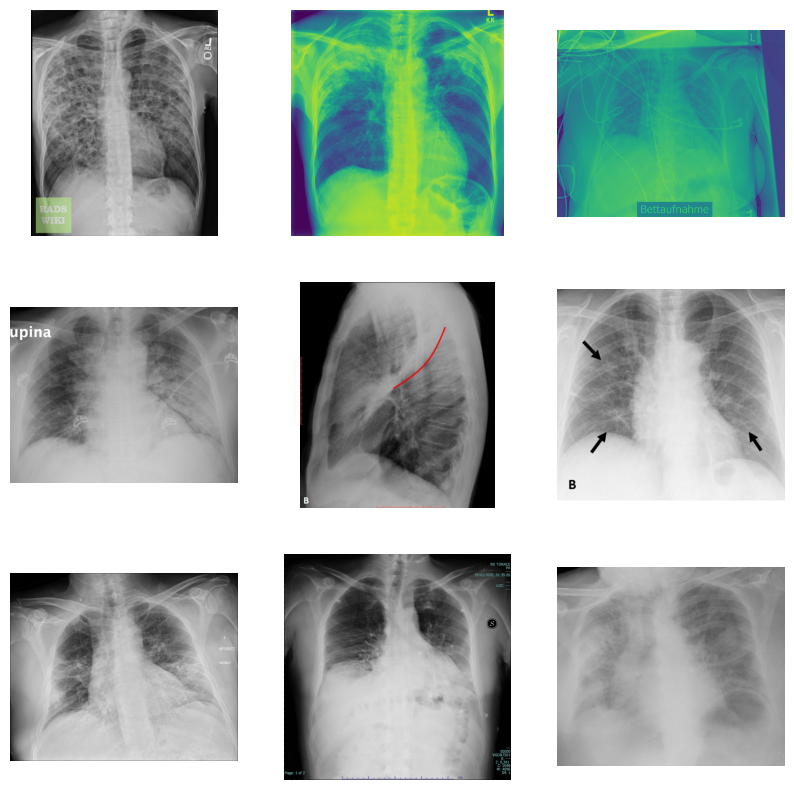

In [4]:
import os
import random
import matplotlib.pyplot as plt

# Define the directory containing your images
image_dir = "/kaggle/input/covid-19-chest-x-ray/Covid-19 chest x-ray/images"

# Get a list of image filenames
image_filenames = os.listdir(image_dir)

# Subsample a smaller number of images for visualization
sample_image_filenames = random.sample(image_filenames, 9)

# Plot sample images
plt.figure(figsize=(10, 10))
for i, filename in enumerate(sample_image_filenames):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(image_dir, filename))
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [5]:
from skimage.transform import resize
from skimage import exposure

# Define preprocessing parameters
image_size = (224, 224)  # Target size for resizing
normalized_images = []

# Preprocess each image
for image in preprocessed_images:  # Replace 'images' with 'preprocessed_images'
    # Resize the image
    resized_image = resize(image, image_size, anti_aliasing=True)
    
    # Normalize the image
    normalized_image = exposure.equalize_adapthist(resized_image)
    
    # Append the normalized image to the list
    normalized_images.append(normalized_image)

# Convert the list of preprocessed images to a numpy array
preprocessed_images = np.array(normalized_images)

NameError: name 'preprocessed_images' is not defined

In [ ]:
# Create a dictionary to map filenames to findings
filename_to_findings = dict(zip(df['filename'], df['finding']))

# Function to get finding based on filename
def get_finding(filename):
    return filename_to_findings.get(filename, 'Unknown')

# Map the findings to image filenames
image_labels = [get_finding(filename) for filename in image_filenames]

In [ ]:
images = preprocessed_images
labels = np.array(image_labels)

In [ ]:
# Check the shape of images and labels to ensure they match
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels to numerical values
encoded_labels = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoded vectors
one_hot_labels = to_categorical(encoded_labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(25, activation='softmax')  # Updated to 25 classes with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

In [ ]:
# Train the model
history = model.fit(images, one_hot_labels, epochs=10, validation_split=0.2)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()